In [2]:
import pandas as pd
import numpy as np

import tensorflow as tf

In [3]:
df = pd.read_csv('train.csv', index_col='id')
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,,,,,,,,,,,,,,,,,,,,,
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [ ]:
df.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [ ]:
df['FloodProbability'].value_counts()

0.490    43320
0.495    42302
0.520    41266
0.485    41156
0.505    41126
         ...  
0.700       32
0.725       29
0.715       26
0.710       23
0.285       20
Name: FloodProbability, Length: 83, dtype: int64

In [ ]:
df.shape

(1117957, 21)

In [ ]:
df.corr()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
MonsoonIntensity,1.000000,-0.007362,-0.008070,-0.007251,-0.009309,-0.008031,-0.007787,-0.007836,-0.008232,-0.010309,...,-0.009716,-0.010659,-0.009121,-0.008900,-0.008486,-0.008679,-0.006811,-0.008155,-0.008474,0.189098
TopographyDrainage,-0.007362,1.000000,-0.009924,-0.008548,-0.010532,-0.009619,-0.007607,-0.009824,-0.009496,-0.012887,...,-0.010056,-0.012526,-0.010240,-0.011067,-0.006628,-0.010815,-0.010267,-0.011617,-0.012350,0.187635
RiverManagement,-0.008070,-0.009924,1.000000,-0.008574,-0.012292,-0.009237,-0.008711,-0.010058,-0.010783,-0.011615,...,-0.011277,-0.011680,-0.008994,-0.011412,-0.005827,-0.006727,-0.010069,-0.009673,-0.011550,0.187131
Deforestation,-0.007251,-0.008548,-0.008574,1.000000,-0.012248,-0.008266,-0.009356,-0.011536,-0.010039,-0.013175,...,-0.010490,-0.012388,-0.009257,-0.010671,-0.008862,-0.011777,-0.011004,-0.010424,-0.009661,0.184001
Urbanization,-0.009309,-0.010532,-0.012292,-0.012248,1.000000,-0.011199,-0.011128,-0.010153,-0.010559,-0.010784,...,-0.012572,-0.014497,-0.010582,-0.012107,-0.010656,-0.011485,-0.011023,-0.011584,-0.013005,0.180861
ClimateChange,-0.008031,-0.009619,-0.009237,-0.008266,-0.011199,1.000000,-0.008427,-0.009457,-0.011517,-0.012533,...,-0.009650,-0.013005,-0.009352,-0.009882,-0.006324,-0.010332,-0.009376,-0.010772,-0.011379,0.184761
DamsQuality,-0.007787,-0.007607,-0.008711,-0.009356,-0.011128,-0.008427,1.000000,-0.009401,-0.009033,-0.010890,...,-0.010439,-0.012096,-0.009924,-0.009085,-0.009831,-0.009599,-0.009372,-0.011374,-0.013081,0.187996
Siltation,-0.007836,-0.009824,-0.010058,-0.011536,-0.010153,-0.009457,-0.009401,1.000000,-0.010179,-0.010628,...,-0.010702,-0.011762,-0.009173,-0.009457,-0.006312,-0.008739,-0.008667,-0.009079,-0.008493,0.186789
AgriculturalPractices,-0.008232,-0.009496,-0.010783,-0.010039,-0.010559,-0.011517,-0.009033,-0.010179,1.000000,-0.012244,...,-0.010845,-0.011415,-0.010624,-0.009901,-0.008708,-0.008958,-0.011392,-0.010418,-0.011157,0.183366
Encroachments,-0.010309,-0.012887,-0.011615,-0.013175,-0.010784,-0.012533,-0.010890,-0.010628,-0.012244,1.000000,...,-0.011994,-0.016203,-0.011299,-0.013542,-0.010404,-0.010645,-0.010364,-0.012175,-0.011860,0.178841


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df['MonsoonIntensity'].isnull().sum()

0

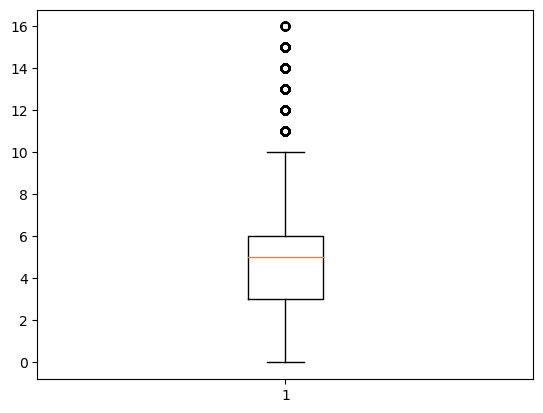

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['MonsoonIntensity'])
plt.show()

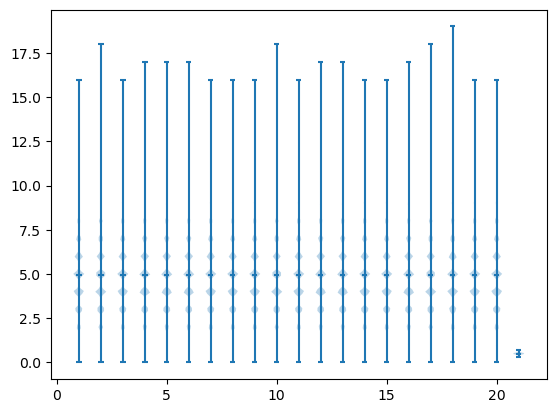

In [ ]:
plt.violinplot(df, showmeans=True)
plt.show()

(array([[1.90000e+01, 4.08000e+02, 3.29400e+03, 7.95300e+03, 1.02440e+04,
         9.20900e+03, 2.67900e+03, 5.38000e+02, 3.20000e+01, 1.00000e+00],
        [9.50000e+01, 1.80600e+03, 1.49350e+04, 4.97020e+04, 7.51330e+04,
         7.26800e+04, 2.70770e+04, 5.31500e+03, 4.86000e+02, 2.80000e+01],
        [4.20000e+01, 1.03000e+03, 9.29200e+03, 3.73950e+04, 6.39530e+04,
         6.58170e+04, 2.99110e+04, 6.27000e+03, 5.97000e+02, 3.70000e+01],
        [3.40000e+01, 1.15800e+03, 1.23150e+04, 5.92620e+04, 1.09465e+05,
         1.24309e+05, 6.54060e+04, 1.62420e+04, 1.72500e+03, 1.00000e+02],
        [5.00000e+00, 2.06000e+02, 2.34100e+03, 1.40420e+04, 2.85850e+04,
         3.50640e+04, 2.18180e+04, 6.22000e+03, 8.80000e+02, 4.90000e+01],
        [7.00000e+00, 1.25000e+02, 1.76200e+03, 1.16600e+04, 2.45000e+04,
         3.24420e+04, 2.10650e+04, 6.83300e+03, 1.01300e+03, 6.20000e+01],
        [0.00000e+00, 1.10000e+01, 2.24000e+02, 1.89600e+03, 4.54300e+03,
         6.68300e+03, 4.58600e+0

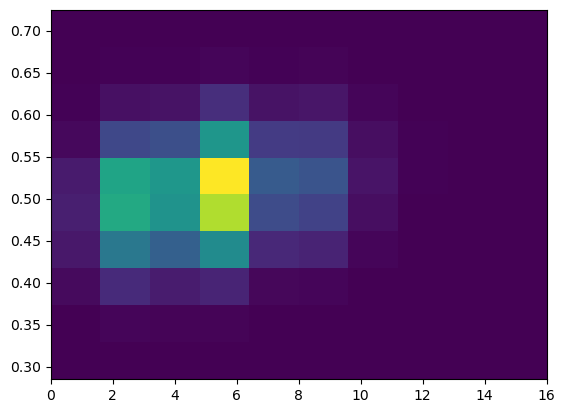

In [ ]:
plt.hist2d(x=df['MonsoonIntensity'], y=df['FloodProbability'])

In [23]:
X_cols = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', ]
Y_cols = df.columns[-1]

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(df[X_cols], df[Y_cols], test_size=0.1)

In [ ]:
svm = make_pipeline(StandardScaler(), SVR(C=100))
svm.fit(X_train, Y_train)

In [ ]:
from sklearn.metrics import accuracy_score

Y_pred = svm.predict(X_test)

In [7]:
Y_true = np.array(Y_test)

In [8]:
from sklearn.metrics import r2_score

print(r2_score(Y_true, Y_pred))

NameError: name 'Y_pred' is not defined

In [25]:
from xgboost import XGBRegressor

xgbr = make_pipeline(StandardScaler(), XGBRegressor(n_estimators=1000, learning_rate=0.03))
xgbr.fit(X_train, Y_train)

Y_pred = xgbr.predict(X_test)

print(r2_score(Y_true, Y_pred))

KeyboardInterrupt: 

In [20]:
test = pd.read_csv('test.csv', index_col='id')

test['FloodProbability'] = xgbr.predict(test[X_cols])

test[['FloodProbability', ]].to_csv('sub.csv')